In [1]:
import pyodbc
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt 

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('./merged_datasets.csv')
vessel_info = pd.read_csv('./vessel_information.csv')

In [3]:
display (vessel_info)

,IMO,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt
0,8905787,3360.0,12223,9094,1995
1,9010929,4080.0,8000,5045,1993
2,9114608,16859.0,148435,79832,1996
3,9125279,5400.0,10044,6877,1996
4,9144794,14004.0,106504,56127,1998
...,...,...,...,...,...
2592,9868778,13450.0,114900,62000,2020
2593,9871012,6560.0,37430,23420,2019
2594,9874210,24330.0,302000,157208,2020
2595,9878838,24500.0,299772,154046,2020


In [4]:
avg_cons_per_distance = data[['IMO', 'Annual average Fuel consumption per distance [kg / n mile]']]
display (avg_cons_per_distance)

,IMO,Annual average Fuel consumption per distance [kg / n mile]
0,9010929,72.10
1,9114608,271.81
2,9125279,75.45
3,9144794,204.86
4,9145437,125.11
...,...,...
5543,9868778,157.68
5544,9869459,327.28
5545,9871012,117.80
5546,9874210,200.28


<AxesSubplot:>

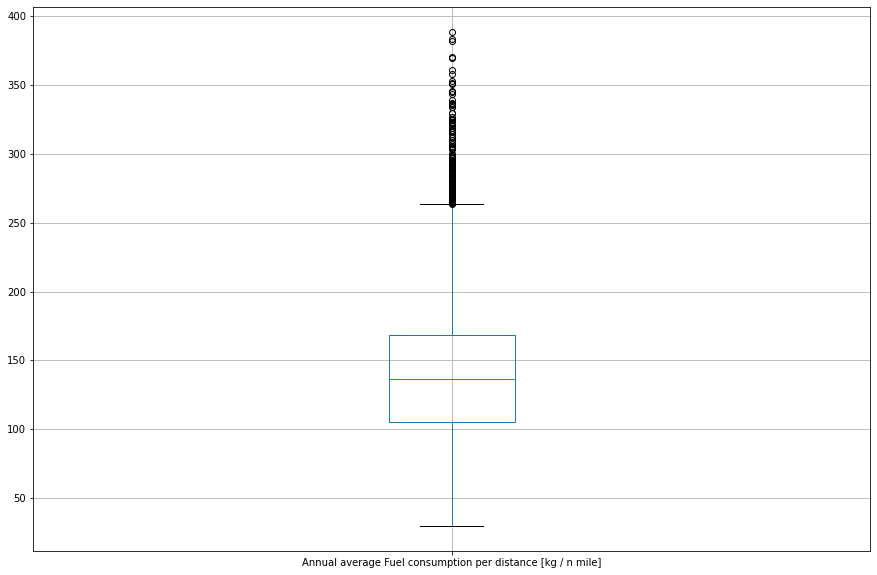

In [5]:
plt.figure(figsize = (15, 10))
avg_cons_per_distance.boxplot('Annual average Fuel consumption per distance [kg / n mile]')

In [6]:
vessel_info_1 = pd.merge(vessel_info, avg_cons_per_distance, how = 'left', on=['IMO'])
vessel_info_1.dropna(subset=['MainEngineKW'], inplace = True)
vessel_info_1.dropna(subset=['Annual average Fuel consumption per distance [kg / n mile]'], inplace = True)
vessel_info_1 = vessel_info_1.drop_duplicates(subset='IMO', keep='last')
vessel_info_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 1 to 5483
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         2336 non-null   int64  
 1   MainEngineKW                                                2336 non-null   float64
 2   Deadweight                                                  2336 non-null   int64  
 3   GrossRatedTonnage                                           2336 non-null   int64  
 4   Yearbuilt                                                   2336 non-null   int64  
 5   Annual average Fuel consumption per distance [kg / n mile]  2336 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 127.8 KB


In [7]:
display (vessel_info_1)

,IMO,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt,Annual average Fuel consumption per distance [kg / n mile]
1,8905787,3360.0,12223,9094,1995,84.58
4,9010929,4080.0,8000,5045,1993,123.98
5,9114608,16859.0,148435,79832,1996,271.81
8,9125279,5400.0,10044,6877,1996,82.97
10,9144794,14004.0,106504,56127,1998,217.68
...,...,...,...,...,...,...
5477,9868156,15690.0,157946,84655,2020,138.90
5478,9868778,13450.0,114900,62000,2020,157.68
5480,9871012,6560.0,37430,23420,2019,117.80
5481,9874210,24330.0,302000,157208,2020,200.28


In [74]:
TargetVariable = ['Annual average Fuel consumption per distance [kg / n mile]']
Predictors = [ 'MainEngineKW','Deadweight', 
           'GrossRatedTonnage', 'Yearbuilt']

X=vessel_info_1[Predictors].values
y=vessel_info_1[TargetVariable].values
 

In [75]:
print (X)

[[  3360.  12223.   9094.   1995.]
 [  4080.   8000.   5045.   1993.]
 [ 16859. 148435.  79832.   1996.]
 ...
 [  6560.  37430.  23420.   2019.]
 [ 24330. 302000. 157208.   2020.]
 [ 21840. 157447.  81502.   2020.]]


In [76]:
### Sandardization of data ###

PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()

#PredictorScaler=StandardScaler()
#TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

print (X)
# Split the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[5.80181016e-02 1.92743012e-02 2.45085309e-02 7.40740741e-02]
 [7.65838942e-02 5.94172563e-03 5.43560320e-05 0.00000000e+00]
 [4.06100926e-01 4.49313797e-01 4.51734863e-01 1.11111111e-01]
 ...
 [1.40532735e-01 9.88561705e-02 1.11031255e-01 9.62962963e-01]
 [5.98746809e-01 9.34139034e-01 9.19051789e-01 1.00000000e+00]
 [5.34540110e-01 4.77765886e-01 4.61820927e-01 1.00000000e+00]]
(1635, 4)
(1635, 1)
(701, 4)
(701, 1)


In [79]:
dump(PredictorScalerFit, open('scaler_neural.pkl', 'wb'))
dump(TargetVarScalerFit, open('scaler_neural_output.pkl', 'wb'))

In [77]:
model = Sequential()
model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer = 'normal', activation = 'relu')) 
# Defining the Second layer of the model
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 50, verbose=1)

Epoch 1/50
164/164 [==============================] - 0s 594us/step - loss: 0.0592
Epoch 2/50
164/164 [==============================] - 0s 606us/step - loss: 0.0164
Epoch 3/50
164/164 [==============================] - 0s 575us/step - loss: 0.0126
Epoch 4/50
164/164 [==============================] - 0s 557us/step - loss: 0.0096
Epoch 5/50
164/164 [==============================] - 0s 796us/step - loss: 0.0085
Epoch 6/50
164/164 [==============================] - 0s 569us/step - loss: 0.0082
Epoch 7/50
164/164 [==============================] - 0s 600us/step - loss: 0.0080
Epoch 8/50
164/164 [==============================] - 0s 630us/step - loss: 0.0079
Epoch 9/50
164/164 [==============================] - 0s 679us/step - loss: 0.0079
Epoch 10/50
164/164 [==============================] - 0s 655us/step - loss: 0.0078
Epoch 11/50
164/164 [==============================] - 0s 661us/step - loss: 0.0078
Epoch 12/50
164/164 [==============================] - 0s 661us/step - loss: 0.0077
E

In [78]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    

    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 74.68366334899731
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 74.12756220851236
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 75.05943017605199
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 77.95875627428453
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 72.95270854964838
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 74.44389839199542
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 75.88217429252302
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 76.83790407284636
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 68.17480468402852
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 73.6796904879203
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 78.28867953684869
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 76.00393799528058
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 61.02152701204258
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 68.77714782940984
15 Parameters: batch_

<AxesSubplot:xlabel='Parameters'>

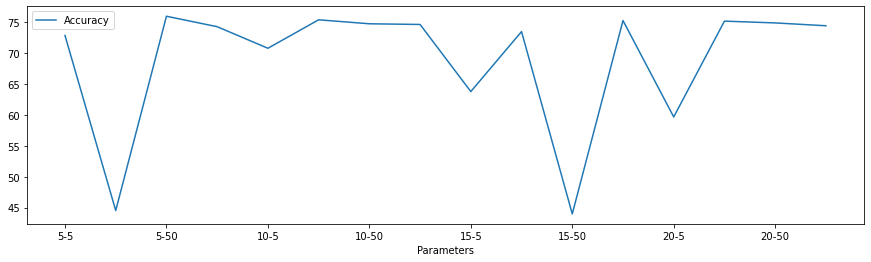

In [73]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [30]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Annual_Consumption']=y_test_orig
TestingData['Predicted_Annual_Consumption']=Predictions
TestingData.head()

,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt,Annual_Consumption,Predicted_Annual_Consumption
0,9960.0,49990.0,29806.0,2015.0,90.62,88.003166
1,16080.0,108560.0,60855.0,2019.0,91.13,130.710709
2,18660.0,158670.0,81509.0,2011.0,175.69,168.936844
3,11110.0,111890.0,60435.0,2020.0,123.42,125.006409
4,13450.0,115711.0,62370.0,2017.0,103.07,134.350723


In [31]:
print (X_test)

[[0.22820453 0.13850977 0.14959988 0.81481481]
 [0.38601377 0.32342309 0.33712215 0.96296296]
 [0.45254119 0.48162706 0.4618632  0.66666667]
 ...
 [0.32072407 0.20383402 0.22428507 0.44444444]
 [0.16807199 0.1381467  0.14870602 0.85185185]
 [0.3210335  0.21746021 0.22828929 0.55555556]]


In [70]:
# Computing the absolute percent error
APE=100*(np.abs(TestingData['Annual_Consumption']-TestingData['Predicted_Annual_Consumption'])/TestingData['Annual_Consumption'])
TestingData['APE']=APE
MAPE = np.mean(TestingData.APE)
print('The Accuracy of ANN model is:', 100-MAPE)
TestingData.head()

The Accuracy of ANN model is: 86.04111033664459


,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt,Annual_Consumption,Predicted_Annual_Consumption,APE
0,9960.0,49990.0,29806.0,2015.0,90.62,88.003166,2.887700
1,16080.0,108560.0,60855.0,2019.0,91.13,130.710709,43.433237
2,18660.0,158670.0,81509.0,2011.0,175.69,168.936844,3.843791
3,11110.0,111890.0,60435.0,2020.0,123.42,125.006409,1.285374
4,13450.0,115711.0,62370.0,2017.0,103.07,134.350723,30.349009


In [80]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [84]:
from pickle import load
scaler  = load(open('scaler_neural.pkl', 'rb'))
scaler_output =  load(open('scaler_neural_output.pkl', 'rb'))
test_num = [[10000, 13131, 12222, 2002]]
test_num_scaled = scaler.transform(test_num)
print (test_num_scaled)

[[0.22923597 0.02214098 0.04340027 0.33333333]]


In [85]:
pred = model.predict(test_num_scaled)
print (pred)
print (pred.shape)

[[0.2415066]]
(1, 1)


In [86]:
out = scaler_output.inverse_transform(pred)
print (out)

[[115.28293]]


Text(0, 0.5, 'Predicted')

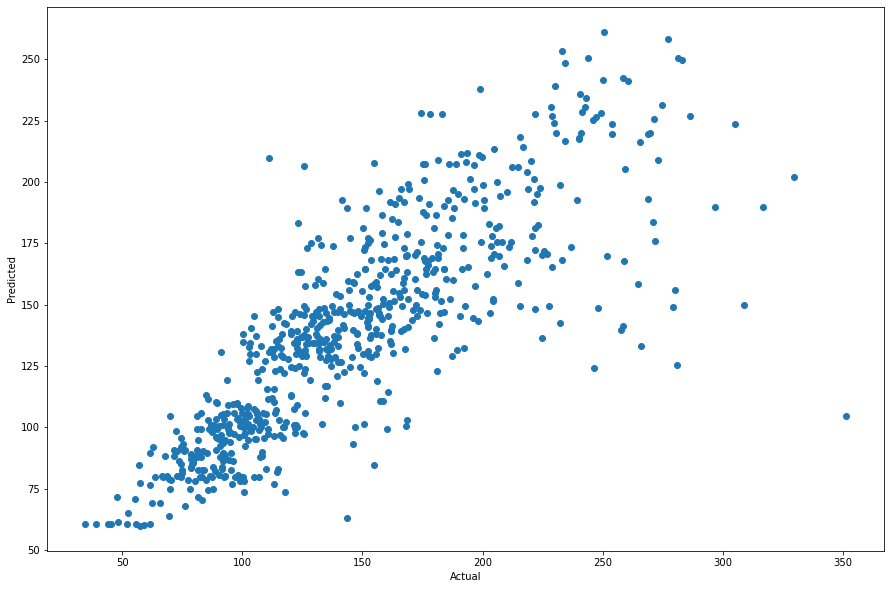

In [69]:
plt.figure(figsize = (15, 10))
plt.scatter(TestingData.Annual_Consumption, TestingData.Predicted_Annual_Consumption)
plt.xlabel('Actual')
plt.ylabel('Predicted')